数据集大小： 500


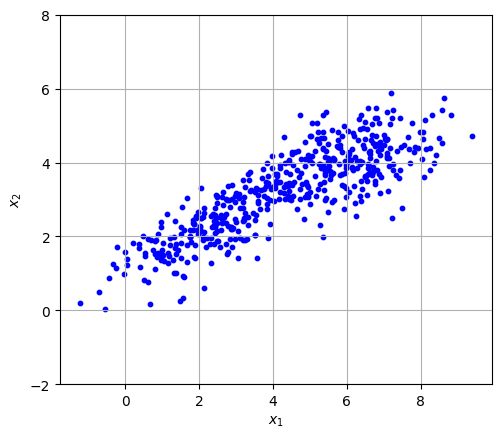

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 导入数据集
data = np.loadtxt("PCA_dataset.csv", delimiter=",")
print("数据集大小：", len(data))

# 可视化
plt.figure()
plt.scatter(data[:, 0], data[:, 1], color="blue", s=10)
plt.axis("square")
plt.ylim(-2, 8)
plt.grid()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

In [2]:
def pca(X, k):
    d, m = X.shape
    if d < k:
        print("k应该小于特征数")
        return X, None

    # 中心化
    X = X - np.mean(X, axis=0)
    # 计算协方差矩阵
    cov = X.T @ X
    # 计算特征值和特征向量
    eig_values, eig_vectors = np.linalg.eig(cov)
    # 获取最大的k个特征值的下标
    idx = np.argsort(-eig_values)[:k]
    # 对应的特征向量
    W = eig_vectors[:, idx]
    # 降维
    X = X @ W
    return X, W

变换矩阵：
 [[ 0.90322448 -0.42916843]
 [ 0.42916843  0.90322448]]


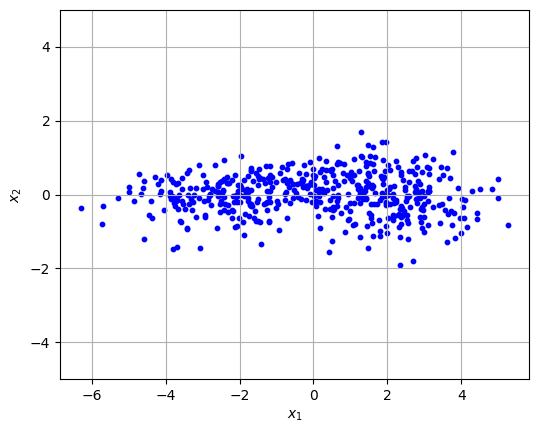

In [3]:
X, W = pca(data, 2)
print("变换矩阵：\n", W)

# 绘图
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color="blue", s=10)
plt.axis("square")
plt.ylim(-5, 5)
plt.grid()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

sklearn计算的变换矩阵：
 [[ 0.90322448 -0.42916843]
 [ 0.42916843  0.90322448]]


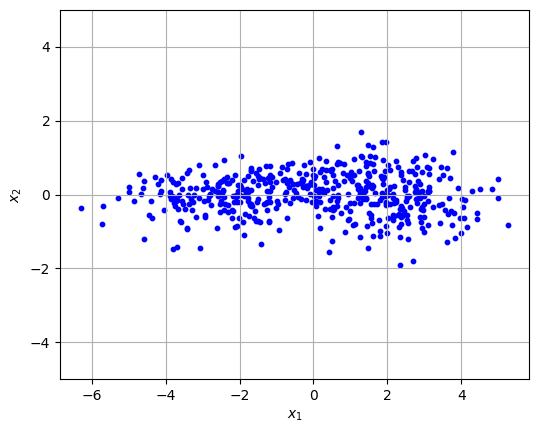

In [4]:
from sklearn.decomposition import PCA

# 中心化
X = data - np.mean(data, axis=0)
pca_res = PCA(n_components=2).fit(X)
W = pca_res.components_.T
print("sklearn计算的变换矩阵：\n", W)
X_pca = X @ W

# 绘图
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], color="blue", s=10)
plt.axis("square")
plt.ylim(-5, 5)
plt.grid()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()